In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("G:/My Drive/GA TECH/ISYE 6416/Project/data/Project_Dataset.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Data Explore and Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### null data

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.LoanAmount=df.LoanAmount.fillna(df.LoanAmount.mean())

df.Credit_History=df.Credit_History.fillna(df.Credit_History.mean())

df.Loan_Amount_Term=df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean())

df['Gender'].fillna(df['Gender'].value_counts().idxmax(), inplace=True)

df['Married'].fillna(df['Married'].value_counts().idxmax(), inplace=True)

df.Dependents.fillna(df.Dependents.value_counts().idxmax(), inplace=True)

df.Self_Employed.fillna(df.Self_Employed.value_counts().idxmax(), inplace=True)

In [7]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### duplicate data

In [8]:
df.duplicated().sum()

0

#### outliers

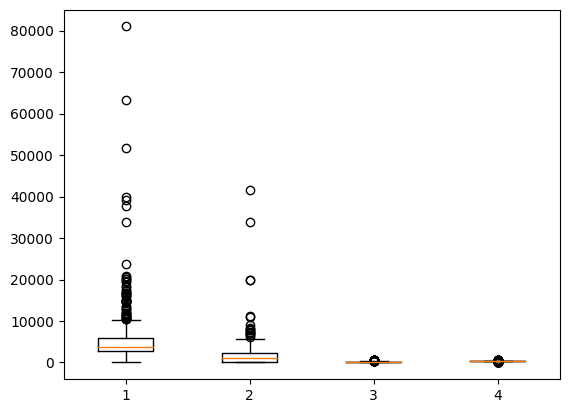

In [9]:
df_sub = df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
plt.boxplot(df_sub)
plt.show()

In [10]:
import numpy as np

def remove_outliers_zscore(data, threshold=3):
    mean = np.mean(data)
    std = np.std(data)
    z_scores = np.abs((data - mean) / std)
    filtered_data = data[z_scores < threshold]
    return filtered_data

In [11]:
filtered_data = remove_outliers_zscore(df_sub)

print('Original data:', df_sub)
print('Filtered data:', filtered_data)


Original data:      ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
0               5849                0.0  146.412162             360.0
1               4583             1508.0  128.000000             360.0
2               3000                0.0   66.000000             360.0
3               2583             2358.0  120.000000             360.0
4               6000                0.0  141.000000             360.0
..               ...                ...         ...               ...
609             2900                0.0   71.000000             360.0
610             4106                0.0   40.000000             180.0
611             8072              240.0  253.000000             360.0
612             7583                0.0  187.000000             360.0
613             4583                0.0  133.000000             360.0

[614 rows x 4 columns]
Filtered data:      ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
0             5849.0                

In [12]:
filtered_data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
filtered_data.isnull().sum()

ApplicantIncome       8
CoapplicantIncome     6
LoanAmount           15
Loan_Amount_Term     12
dtype: int64

In [13]:
filtered_data.ApplicantIncome = filtered_data.ApplicantIncome.fillna(filtered_data.ApplicantIncome.mean())
filtered_data.CoapplicantIncome = filtered_data.CoapplicantIncome.fillna(filtered_data.CoapplicantIncome.mean())
filtered_data.LoanAmount = filtered_data.LoanAmount.fillna(filtered_data.LoanAmount.mean())
filtered_data.Loan_Amount_Term = filtered_data.Loan_Amount_Term.fillna(filtered_data.Loan_Amount_Term.mean())

filtered_data.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
dtype: int64

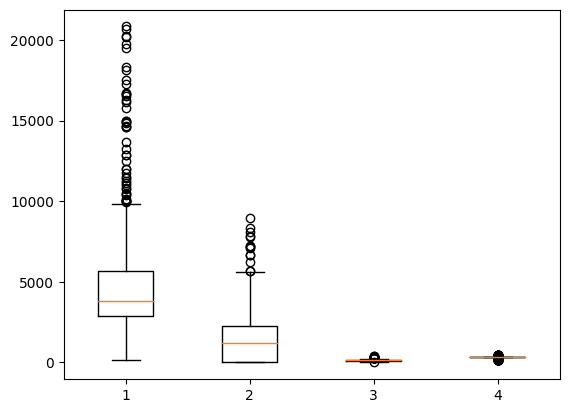

In [14]:
plt.boxplot(filtered_data)
plt.show()

In [15]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']] = filtered_data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]

#### skewness

In [16]:
df.skew()

ApplicantIncome      2.289214
CoapplicantIncome    1.386813
LoanAmount           1.221277
Loan_Amount_Term    -2.059879
Credit_History      -1.963600
dtype: float64

In [17]:
df.ApplicantIncome=df.ApplicantIncome.clip(lower=df.ApplicantIncome.quantile(0.05),upper=df.ApplicantIncome.quantile(0.95))

df.CoapplicantIncome=df.CoapplicantIncome.clip(lower=df.CoapplicantIncome.quantile(0.05),upper=df.CoapplicantIncome.quantile(0.95))

df.Loan_Amount_Term=df.Loan_Amount_Term.clip(lower=df.Loan_Amount_Term.quantile(0.14),upper=df.Loan_Amount_Term.quantile(0.86))

df.LoanAmount=df.LoanAmount.clip(lower=df.LoanAmount.quantile(0.05),upper=df.LoanAmount.quantile(0.95))

df.Credit_History=df.Credit_History.clip(lower=df.Credit_History.quantile(0.05),upper=df.Credit_History.quantile(0.95))

df.ApplicantIncome=df.ApplicantIncome.clip(lower=df.ApplicantIncome.quantile(0.10),upper=df.ApplicantIncome.quantile(0.90))

In [18]:
df.skew()

ApplicantIncome      0.921633
CoapplicantIncome    0.759868
LoanAmount           0.762964
Loan_Amount_Term    -2.059922
Credit_History      -1.963600
dtype: float64

#### replace the category to numeric value

In [19]:
df.Loan_Status.replace('N',0,inplace=True)
df.Loan_Status.replace('Y',1,inplace=True)

df.Gender.replace('Female',0,inplace=True)
df.Gender.replace('Male',1,inplace=True)

df.Married.replace('No',0,inplace=True)
df.Married.replace('Yes',1,inplace=True)

df.Self_Employed.replace('No',0,inplace=True)
df.Self_Employed.replace('Yes',1,inplace=True)

df.Dependents.replace('3+',3,inplace=True)

df.Education.replace('Not Graduate',0,inplace=True)
df.Education.replace('Graduate',1,inplace=True)


In [20]:
df = df.drop(['Loan_ID'],axis=1)

In [21]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849.0,0.0,146.412162,360.0,1.0,Urban,1
1,1,1,1,1,0,4583.0,1508.0,128.000000,360.0,1.0,Rural,0
2,1,1,0,1,1,3000.0,0.0,66.000000,360.0,1.0,Urban,1
3,1,1,0,0,0,2583.0,2358.0,120.000000,360.0,1.0,Urban,1
4,1,0,0,1,0,6000.0,0.0,141.000000,360.0,1.0,Urban,1


## Descriptive Statistics

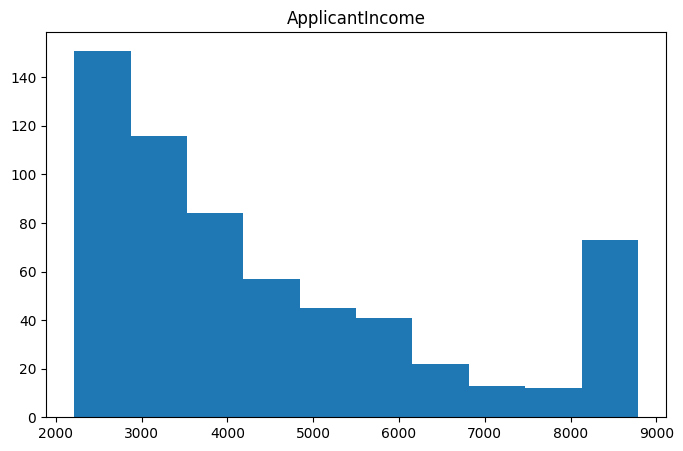

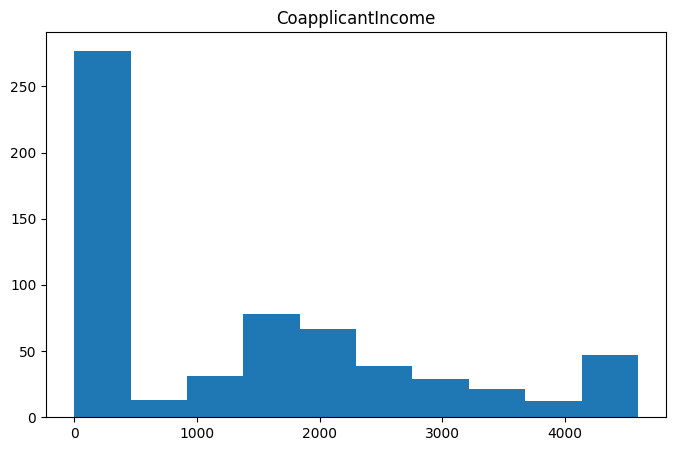

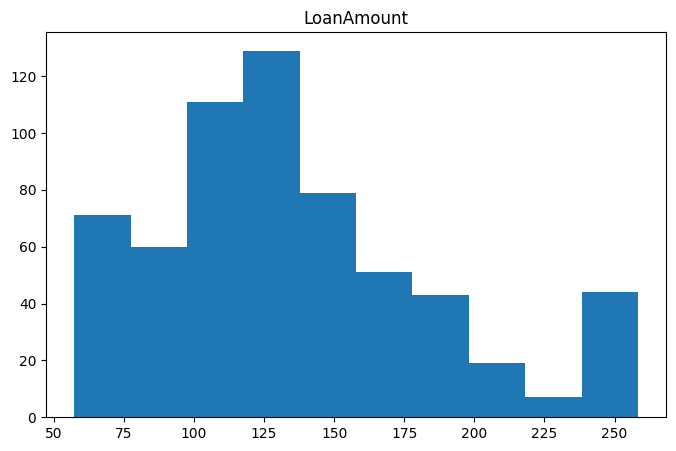

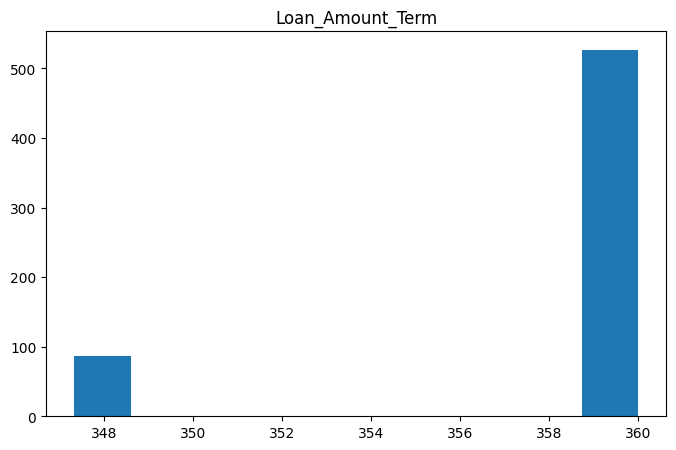

In [25]:
num=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']
for column in num:
    plt.figure(figsize=(8,5))
    plt.hist(df[column])
    plt.title(column)
    plt.show()

<AxesSubplot: xlabel='Gender,Loan_Status'>

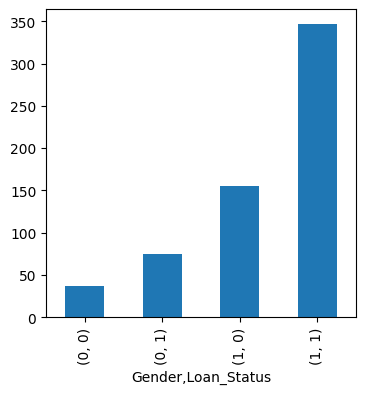

In [31]:
df.groupby('Gender')['Loan_Status'].value_counts().sort_values().plot(kind='bar',figsize=(4,4))

<AxesSubplot: xlabel='Married,Loan_Status'>

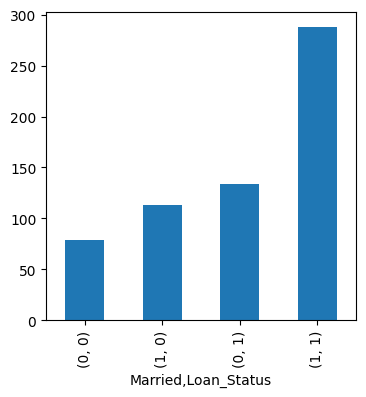

In [32]:
df.groupby('Married')['Loan_Status'].value_counts().sort_values().plot(kind='bar',figsize=(4,4))

<AxesSubplot: xlabel='Dependents,Loan_Status'>

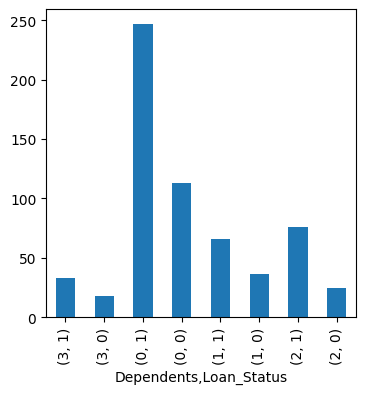

In [34]:
df.groupby('Dependents')['Loan_Status'].value_counts().plot(kind='bar',figsize=(4,4))

<AxesSubplot: xlabel='Dependents,Loan_Status'>

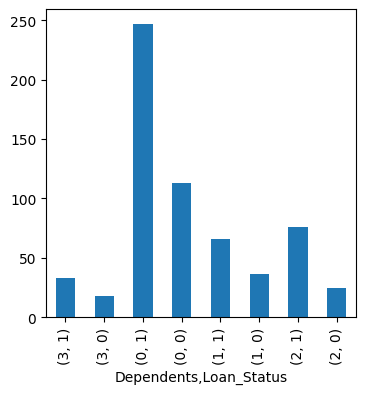

In [43]:
df.groupby('Dependents')['Loan_Status'].value_counts().plot(kind='bar',figsize=(4,4),color=['tab:blue'])

<AxesSubplot: xlabel='Education,Loan_Status'>

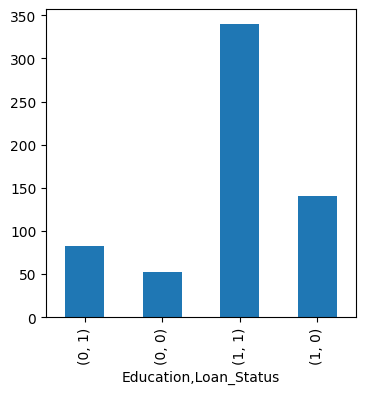

In [44]:
df.groupby('Education')['Loan_Status'].value_counts().plot(kind='bar',figsize=(4,4), color=['tab:blue'])

<AxesSubplot: xlabel='Self_Employed,Loan_Status'>

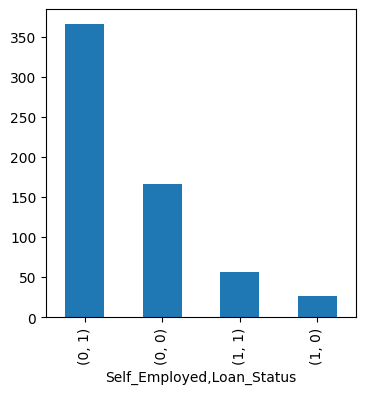

In [45]:
df.groupby('Self_Employed')['Loan_Status'].value_counts().plot(kind='bar',figsize=(4,4),color=['tab:blue'])

<AxesSubplot: xlabel='Property_Area,Loan_Status'>

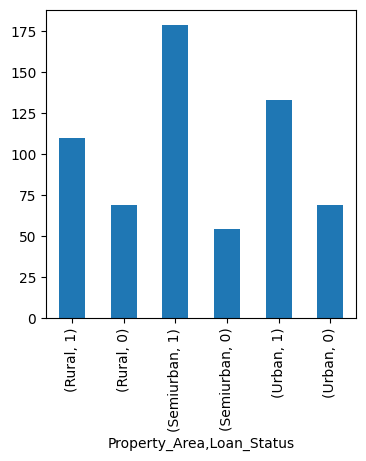

In [47]:
df.groupby('Property_Area')['Loan_Status'].value_counts().plot(kind='bar',figsize=(4,4),color=['tab:blue'])

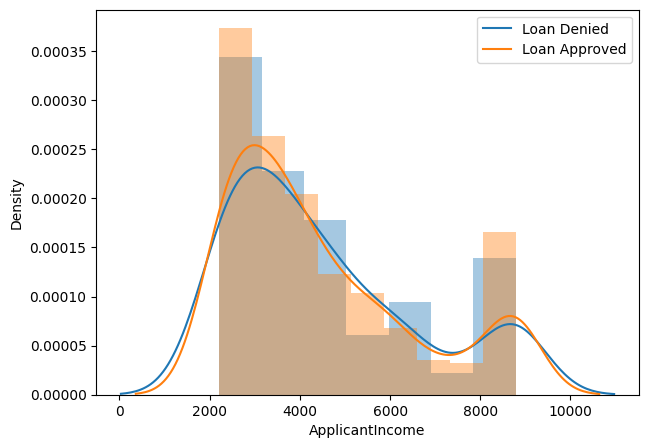

In [61]:
plt.figure(figsize=(7,5))
sns.distplot(df['ApplicantIncome'][df.Loan_Status==0])
sns.distplot(df['ApplicantIncome'][df.Loan_Status==1])
plt.legend(['Loan Denied','Loan Approved'])
plt.show()

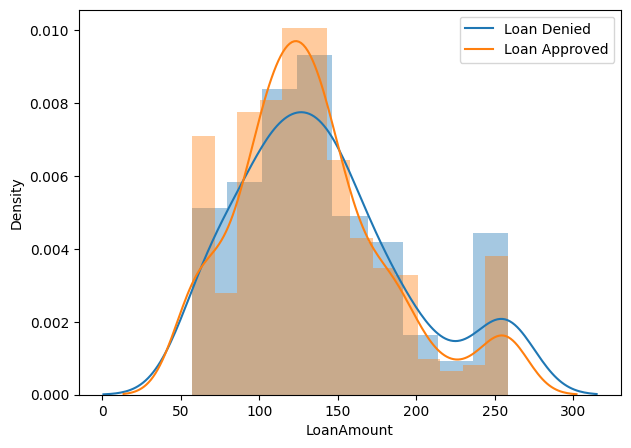

In [62]:
plt.figure(figsize=(7,5))
sns.distplot(df['LoanAmount'][df.Loan_Status==0])
sns.distplot(df['LoanAmount'][df.Loan_Status==1])
plt.legend(['Loan Denied','Loan Approved'])
plt.show()

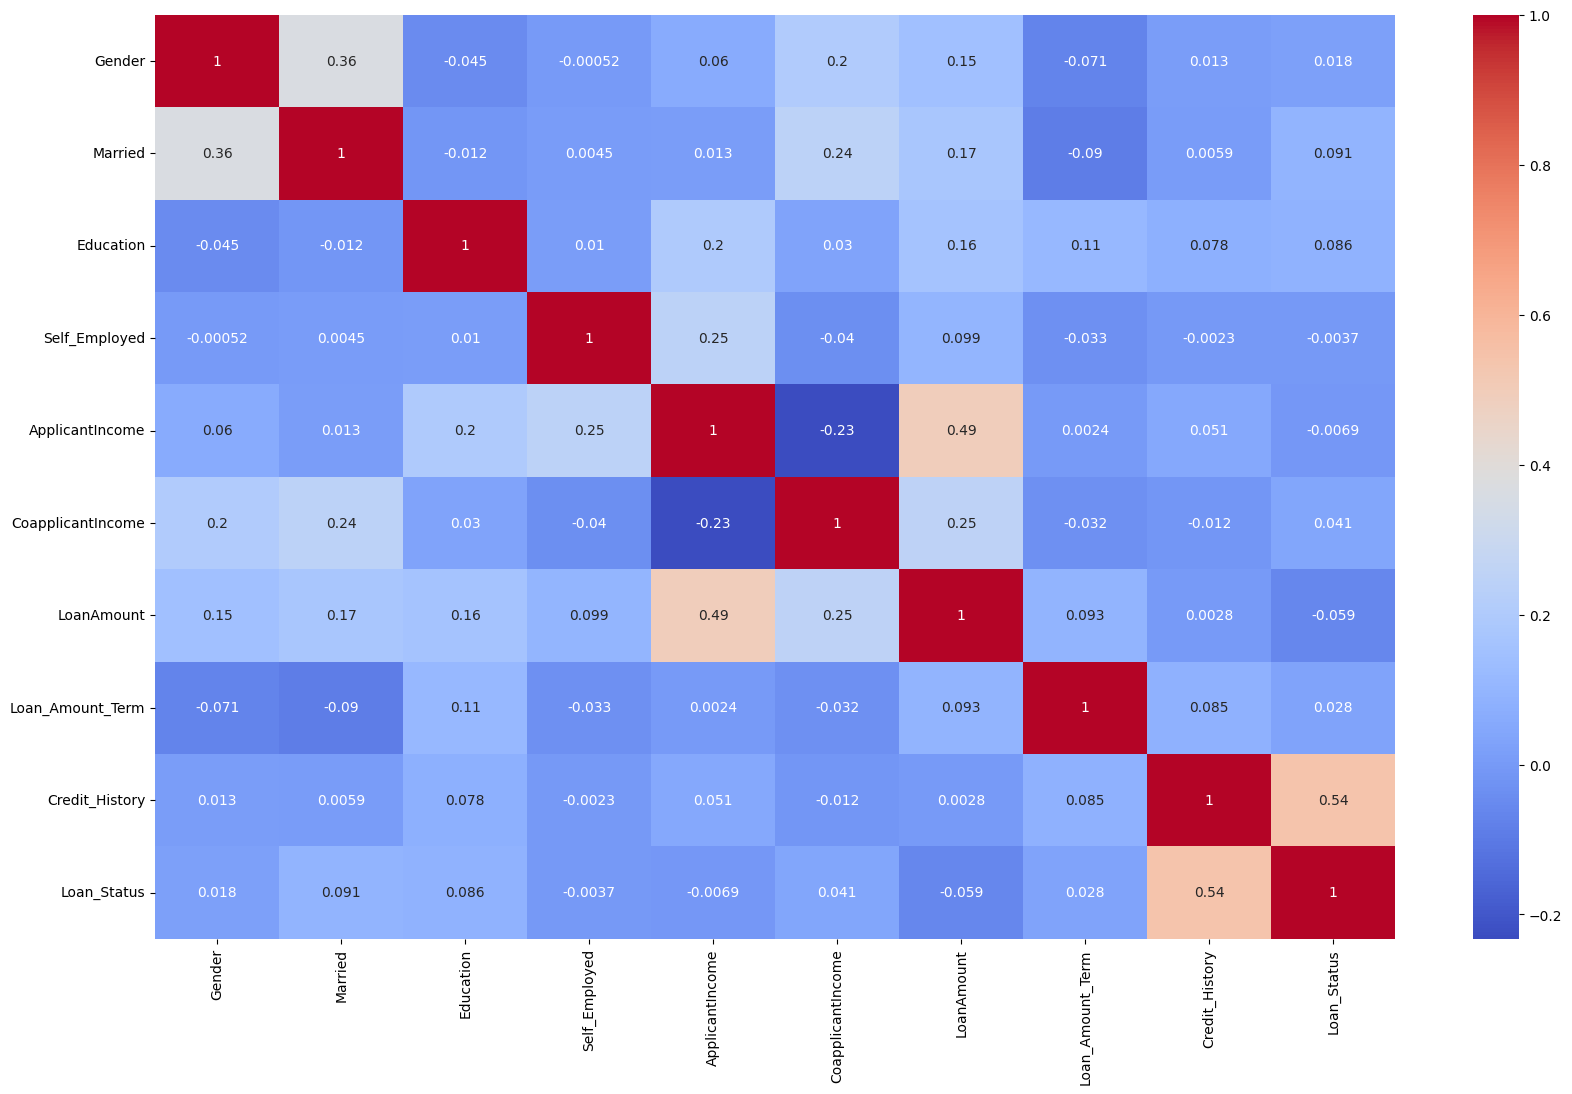

In [63]:
cor=df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

## Decision Tree

In [27]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae,median_absolute_error as mee,classification_report as cr,accuracy_score as ac

In [28]:
x=df[['Dependents','Education','Self_Employed','ApplicantIncome','LoanAmount','Credit_History']]
y=df[['Loan_Status']]

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [30]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier()

param_grid = {
    'max_depth': [2, 4, 6, 8],
}

grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(x, y)

print('Best hyperparameters:', grid_search.best_params_)

Best hyperparameters: {'max_depth': 2}


In [31]:
model1=DecisionTreeClassifier(max_depth=2)
model1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [32]:
y_pred1 = model1.predict(x_test)
y_pred1

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [33]:
from sklearn.model_selection import cross_val_score
print("accuracy score:", ac(y_test,y_pred1)*100)
score1=(cross_val_score(model1,x,y,cv=5))
print("cross validation score:",np.mean(score1)*100)

accuracy score: 76.42276422764228
cross validation score: 80.9462881514061


Text(0.5, 1.0, 'Confusion Matrix')

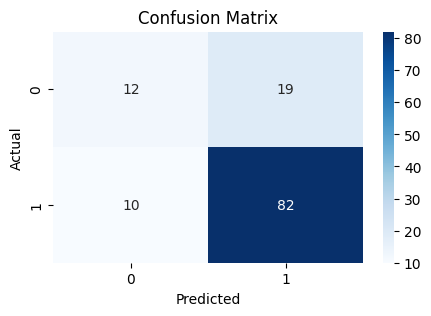

In [34]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,y_pred1)
plt.figure(figsize=(5,3))
fg=sns.heatmap(cm1,annot=True,cmap="Blues")
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")

In [35]:
# this is simply 1-accuracy rate
print("misclassification rate of decision tree:", (cm1[0,1] + cm1[1,0]) / np.sum(cm1))

misclassification rate of decision tree: 0.23577235772357724


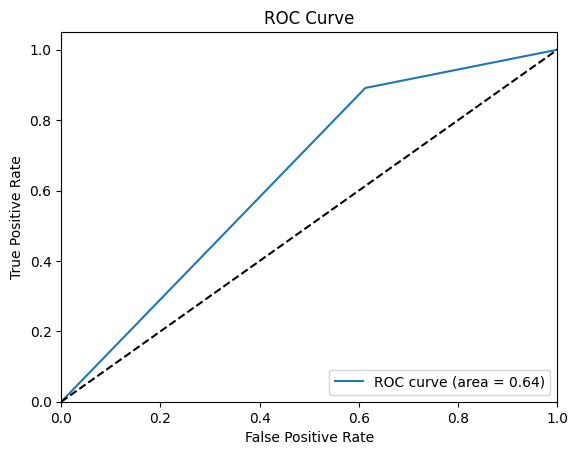

In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = roc_auc_score(y_test, y_pred1)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [37]:
print("FPR:", fpr[:10])
print("TPR:", tpr[:10])

FPR: [0.         0.61290323 1.        ]
TPR: [0.         0.89130435 1.        ]


In [82]:
newinput=[[0,0,0,5849.0,146.412162,1.0]]
output1=model1.predict(newinput)
output1

array([1], dtype=int64)

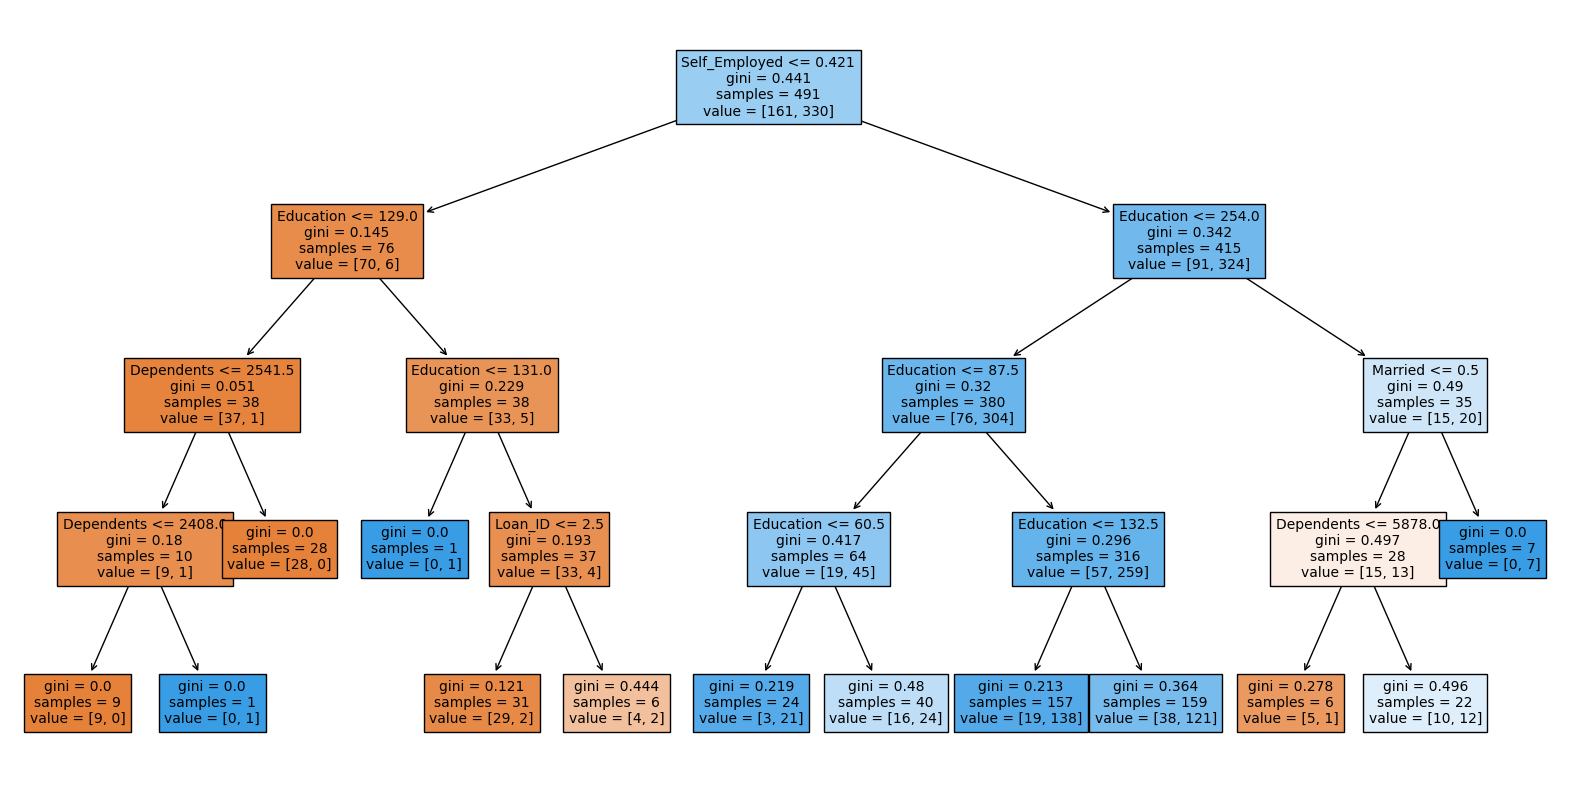

In [195]:
# to see which variable affect the decision
plt.figure(figsize=(20,10))
plot_tree(model1, feature_names=df.columns ,fontsize=10, filled=True)
plt.show()

## Logistic regression

In [54]:
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression()
model2.fit(x_train,y_train)

LogisticRegression()

In [55]:
y_pred2 = model2.predict(x_test)
y_pred2

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [56]:
from sklearn.model_selection import cross_val_score
print("accuracy score:", ac(y_test,y_pred2)*100)
score2=(cross_val_score(model2,x,y,cv=5))
print("cross validation score:",np.mean(score2)*100)

accuracy score: 82.92682926829268
cross validation score: 80.9462881514061


Text(0.5, 1.0, 'Confusion Matrix')

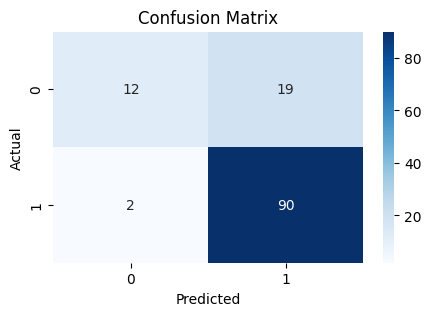

In [41]:
cm2=confusion_matrix(y_test,y_pred2)
plt.figure(figsize=(5,3))
fg=sns.heatmap(cm2,annot=True,cmap="Blues")
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")

In [42]:
# this is simply 1-accuracy rate
print("misclassification rate of logistic regression:", (cm2[0,1] + cm2[1,0]) / np.sum(cm2))

misclassification rate of logistic regression: 0.17073170731707318


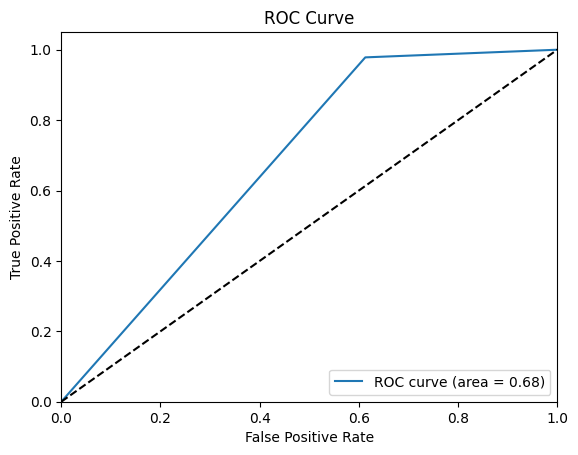

In [43]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = roc_auc_score(y_test, y_pred2)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [44]:
print("FPR:", fpr[:10])
print("TPR:", tpr[:10])

FPR: [0.         0.61290323 1.        ]
TPR: [0.         0.97826087 1.        ]


In [92]:
newinput=[[0,0,0,5849.0,146.412162,1.0]]
output2=model2.predict(newinput)
output2

array([1], dtype=int64)

## Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)

param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8]
}

grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(x, y)

print('Best hyperparameters:', grid_search.best_params_)

Best hyperparameters: {'max_depth': 6, 'min_samples_split': 2}


In [47]:
model3 = RandomForestClassifier(n_estimators=100, max_depth=6, min_samples_split=8)
model3.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_split=8)

In [48]:
y_pred3 = model3.predict(x_test)
y_pred3

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [49]:
print("accuracy score:", ac(y_test,y_pred3)*100)
score3=(cross_val_score(model3,x,y,cv=5))
print("cross validation score:",np.mean(score3)*100)

accuracy score: 81.30081300813008
cross validation score: 80.29321604691458


Text(0.5, 1.0, 'Confusion Matrix')

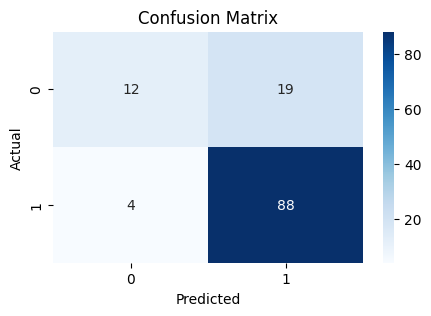

In [50]:
cm3=confusion_matrix(y_test,y_pred3)
plt.figure(figsize=(5,3))
fg=sns.heatmap(cm3,annot=True,cmap="Blues")
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")

In [51]:
# this is simply 1-accuracy rate
print("misclassification rate of random forest:", (cm3[0,1] + cm3[1,0]) / np.sum(cm3))

misclassification rate of random forest: 0.18699186991869918


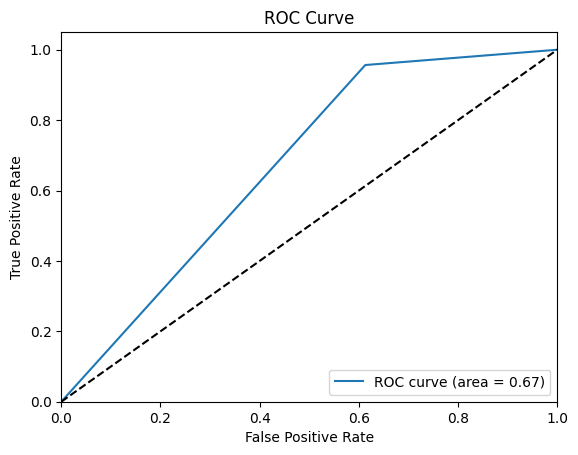

In [52]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = roc_auc_score(y_test, y_pred3)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [53]:
print("FPR:", fpr[:10])
print("TPR:", tpr[:10])

FPR: [0.         0.61290323 1.        ]
TPR: [0.         0.95652174 1.        ]


In [94]:
newinput=[[0,0,0,5849.0,146.412162,1.0]]
output3=model3.predict(newinput)
output3

array([1], dtype=int64)

## SVM

In [220]:
from sklearn.svm import SVC

model4 = SVC(kernel='linear')
model4.fit(x_train,y_train)

SVC(kernel='linear')

In [221]:
y_pred4 = model4.predict(x_test)
y_pred4

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [222]:
print("accuracy score:", ac(y_test,y_pred4)*100)
score4=(cross_val_score(model4,x,y,cv=5))
print("cross validation score:",np.mean(score4)*100)

accuracy score: 80.48780487804879
cross validation score: 79.31760629081698


Text(0.5, 1.0, 'Confusion Matrix')

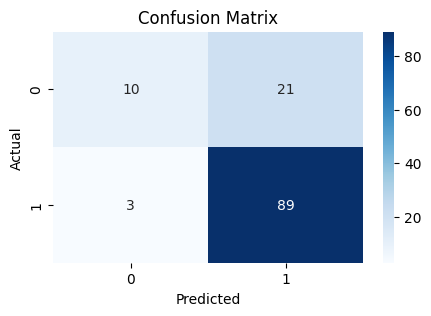

In [223]:
cm4=confusion_matrix(y_test,y_pred4)
plt.figure(figsize=(5,3))
fg=sns.heatmap(cm4,annot=True,cmap="Blues")
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")

In [224]:
# this is simply 1-accuracy rate
print("misclassification rate of SVM:", (cm4[0,1] + cm4[1,0]) / np.sum(cm4))

misclassification rate of SVM: 0.1951219512195122


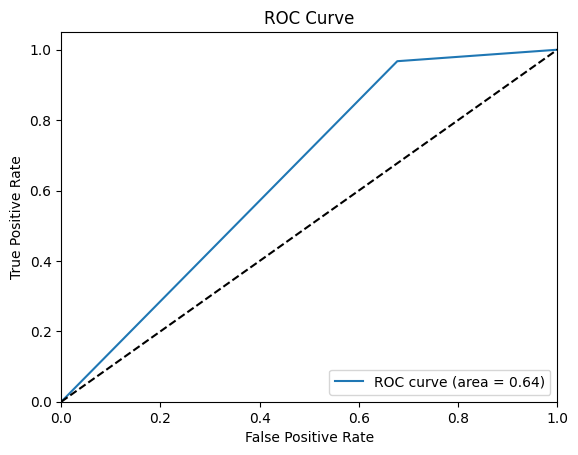

In [225]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred4)
roc_auc = roc_auc_score(y_test, y_pred4)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [226]:
newinput=[[0,0,0,5849.0,146.412162,1.0]]
output4=model4.predict(newinput)
output4

array([1], dtype=int64)

## GaussianNB

In [124]:
from sklearn.naive_bayes import GaussianNB

model5 = GaussianNB()
model5.fit(x_train,y_train)

GaussianNB()

In [125]:
y_pred5 = model5.predict(x_test)
y_pred5

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [128]:
from sklearn.model_selection import cross_val_score

print("accuracy score:", ac(y_test,y_pred5)*100)
score5=(cross_val_score(model5,x,y,cv=5))
print("cross validation score:",np.mean(score5)*100)

accuracy score: 83.73983739837398
cross validation score: 80.9462881514061


Text(0.5, 1.0, 'Confusion Matrix')

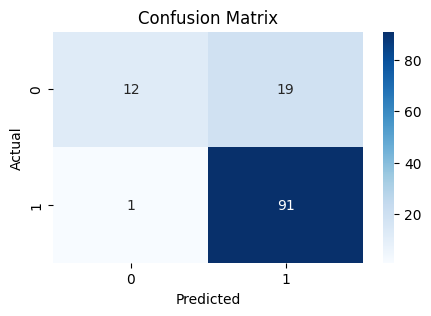

In [129]:
cm5=confusion_matrix(y_test,y_pred5)
plt.figure(figsize=(5,3))
fg=sns.heatmap(cm5,annot=True,cmap="Blues")
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")

In [130]:
# this is simply 1-accuracy rate
print("misclassification rate of GMM:", (cm5[0,1] + cm5[1,0]) / np.sum(cm5))

misclassification rate of GMM: 0.16260162601626016


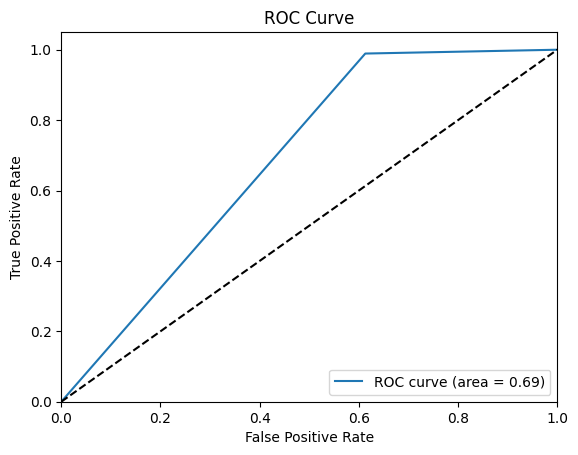

In [131]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred5)
roc_auc = roc_auc_score(y_test, y_pred5)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [132]:
newinput=[[0,0,0,5849.0,146.412162,1.0]]
output5=model5.predict(newinput)
output5

array([1], dtype=int64)